# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
tab = pd.crosstab(df['sex'],df['flag_doente'],margins=True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [5]:
tab['qnt media doentes'] = tab[1]/tab['All']
tab

flag_doente,0,1,All,qnt media doentes
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [6]:
tab['Odds doente'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,qnt media doentes,Odds doente
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [7]:
tab.loc['All','Odds doente']

0.8475609756097561

In [8]:
tab['Odds ratio total'] = tab['Odds doente']/tab.loc['All','Odds doente']
tab

flag_doente,0,1,All,qnt media doentes,Odds doente,Odds ratio total
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [9]:
tab['Log Odds'] = np.log(tab['Odds doente'])
tab

flag_doente,0,1,All,qnt media doentes,Odds doente,Odds ratio total,Log Odds
sex,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [10]:
tab['WOE log odds ratio'] = np.log(tab['Odds ratio total'])
tab

flag_doente,0,1,All,qnt media doentes,Odds doente,Odds ratio total,Log Odds,WOE log odds ratio
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [11]:
df.age = pd.cut(df.age,bins=[20,40,47,55,60,80])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,"(60, 80]",1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,"(60, 80]",1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,"(60, 80]",1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,"(20, 40]",1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,"(40, 47]",0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"(40, 47]",1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,"(60, 80]",1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,"(55, 60]",1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,"(55, 60]",0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [12]:
tab2 = pd.crosstab(df.age,df.flag_doente,margins=True)
tab2

flag_doente,0,1,All
age,,,
"(20, 40]",12,6,18
"(40, 47]",42,15,57
"(47, 55]",48,28,76
"(55, 60]",27,46,73
"(60, 80]",35,44,79
All,164,139,303


In [13]:
tab2['media doentes por idade'] = tab2[1]/tab2['All']
tab2

flag_doente,0,1,All,media doentes por idade
age,,,,
"(20, 40]",12,6,18,0.333333
"(40, 47]",42,15,57,0.263158
"(47, 55]",48,28,76,0.368421
"(55, 60]",27,46,73,0.630137
"(60, 80]",35,44,79,0.556962
All,164,139,303,0.458746


In [14]:
tab2['Odds'] = tab2[1]/tab2[0]
tab2

flag_doente,0,1,All,media doentes por idade,Odds
age,,,,,
"(20, 40]",12,6,18,0.333333,0.500000
"(40, 47]",42,15,57,0.263158,0.357143
"(47, 55]",48,28,76,0.368421,0.583333
"(55, 60]",27,46,73,0.630137,1.703704
"(60, 80]",35,44,79,0.556962,1.257143
All,164,139,303,0.458746,0.847561


In [15]:
tab2['odds ratio total'] = tab2['Odds']/tab2.loc['All','Odds']
tab2

flag_doente,0,1,All,media doentes por idade,Odds,odds ratio total
age,,,,,,
"(20, 40]",12,6,18,0.333333,0.500000,0.589928
"(40, 47]",42,15,57,0.263158,0.357143,0.421377
"(47, 55]",48,28,76,0.368421,0.583333,0.688249
"(55, 60]",27,46,73,0.630137,1.703704,2.010125
"(60, 80]",35,44,79,0.556962,1.257143,1.483248
All,164,139,303,0.458746,0.847561,1.000000


In [16]:
tab2['log odds'] = np.log(tab2['Odds'])
tab2

flag_doente,0,1,All,media doentes por idade,Odds,odds ratio total,log odds
age,,,,,,,
"(20, 40]",12,6,18,0.333333,0.500000,0.589928,-0.693147
"(40, 47]",42,15,57,0.263158,0.357143,0.421377,-1.029619
"(47, 55]",48,28,76,0.368421,0.583333,0.688249,-0.538997
"(55, 60]",27,46,73,0.630137,1.703704,2.010125,0.532805
"(60, 80]",35,44,79,0.556962,1.257143,1.483248,0.228842
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [17]:
tab2['WOE log odds ratio'] = np.log(tab2['odds ratio total'])
tab2

flag_doente,0,1,All,media doentes por idade,Odds,odds ratio total,log odds,WOE log odds ratio
age,,,,,,,,
"(20, 40]",12,6,18,0.333333,0.500000,0.589928,-0.693147,-0.527755
"(40, 47]",42,15,57,0.263158,0.357143,0.421377,-1.029619,-0.864227
"(47, 55]",48,28,76,0.368421,0.583333,0.688249,-0.538997,-0.373604
"(55, 60]",27,46,73,0.630137,1.703704,2.010125,0.532805,0.698197
"(60, 80]",35,44,79,0.556962,1.257143,1.483248,0.228842,0.394234
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

In [22]:
tab['sexo'] = [0,1,'All']

In [24]:
tab

flag_doente,0,1,All,qnt media doentes,Odds doente,Odds ratio total,Log Odds,WOE log odds ratio,sexo
sex,,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398,0
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802,1
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,All


In [27]:
tab = tab.rename(columns={
    0:'nao doente',
    1:'doente'
})

In [28]:
tab

flag_doente,nao doente,doente,All,qnt media doentes,Odds doente,Odds ratio total,Log Odds,WOE log odds ratio,sexo
sex,,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398,0
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802,1
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,All


<AxesSubplot:xlabel='sexo', ylabel='nao doente'>

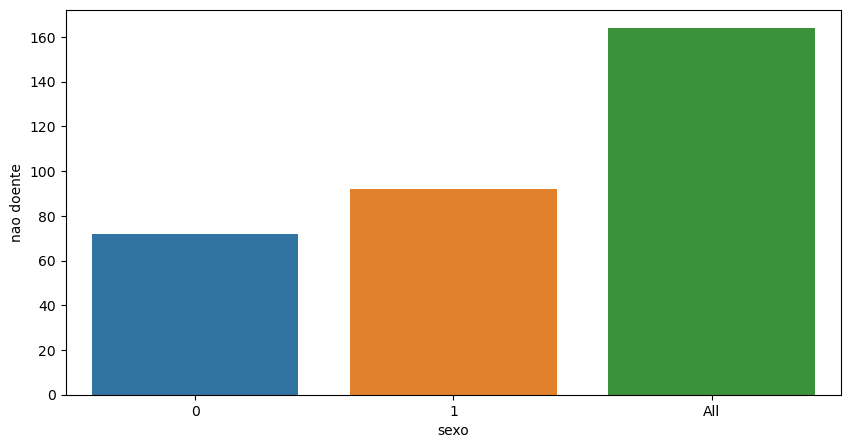

In [32]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='sexo',y='nao doente',data=tab)

<AxesSubplot:xlabel='sexo', ylabel='doente'>

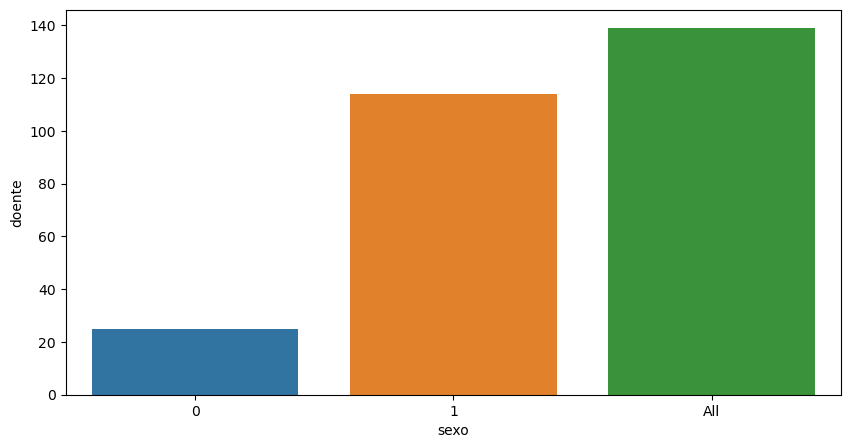

In [33]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='sexo',y='doente',data=tab)

<AxesSubplot:xlabel='sexo', ylabel='Odds doente'>

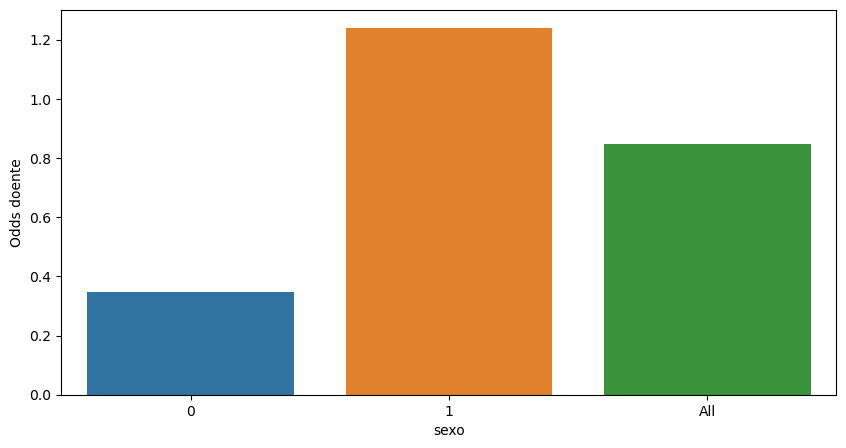

In [34]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='sexo',y='Odds doente',data=tab)

<AxesSubplot:xlabel='sexo', ylabel='Odds ratio total'>

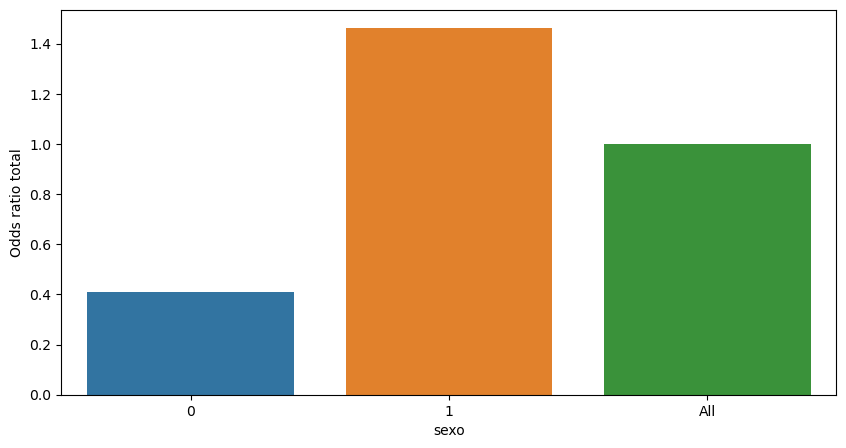

In [36]:
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(x='sexo',y='Odds ratio total',data=tab)